In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 100)

In [2]:
track_record = pd.read_csv('experiments/all_series_final_solution.csv')
#track_record = pd.read_csv('experiments/all_series_final_solution_2.csv')
track_record

,0,1,2,3,4,5
0,2738735,0.480377,5,2019-04-27,False,True
1,2738739,0.000000,5,2019-04-27,False,True
2,2738740,0.185077,5,2019-04-27,False,True
3,2740879,0.121340,4,2019-04-28,True,True
4,2740882,0.085205,5,2019-04-28,True,True
...,...,...,...,...,...,...
1384,5924758,NaN,5,2022-11-13,True,False
1385,5924757,NaN,5,2022-11-13,True,False
1386,5924755,NaN,5,2022-11-13,True,False
1387,5924772,NaN,5,2022-11-13,True,False


In [3]:
track_record.columns = ['game_id',	'return',	'n_bets',	'datetime',	'time_limit_flag', 'is_valid_solution']
track_record

,game_id,return,n_bets,datetime,time_limit_flag,is_valid_solution
0,2738735,0.480377,5,2019-04-27,False,True
1,2738739,0.000000,5,2019-04-27,False,True
2,2738740,0.185077,5,2019-04-27,False,True
3,2740879,0.121340,4,2019-04-28,True,True
4,2740882,0.085205,5,2019-04-28,True,True
...,...,...,...,...,...,...
1384,5924758,NaN,5,2022-11-13,True,False
1385,5924757,NaN,5,2022-11-13,True,False
1386,5924755,NaN,5,2022-11-13,True,False
1387,5924772,NaN,5,2022-11-13,True,False


In [4]:
track_record.head(10)

,game_id,return,n_bets,datetime,time_limit_flag,is_valid_solution
0,2738735,0.480377,5,2019-04-27,False,True
1,2738739,0.000000,5,2019-04-27,False,True
2,2738740,0.185077,5,2019-04-27,False,True
3,2740879,0.121340,4,2019-04-28,True,True
4,2740882,0.085205,5,2019-04-28,True,True
5,2740887,0.047053,5,2019-04-28,True,True
6,2740886,0.759882,5,2019-04-28,True,True
7,2740885,0.035544,5,2019-04-28,True,True
8,2740906,0.058729,5,2019-04-28,True,True
9,2740905,0.041237,5,2019-04-28,True,True


In [5]:
track_record.head(10)

,game_id,return,n_bets,datetime,time_limit_flag,is_valid_solution
0,2738735,0.480377,5,2019-04-27,False,True
1,2738739,0.000000,5,2019-04-27,False,True
2,2738740,0.185077,5,2019-04-27,False,True
3,2740879,0.121340,4,2019-04-28,True,True
4,2740882,0.085205,5,2019-04-28,True,True
5,2740887,0.047053,5,2019-04-28,True,True
6,2740886,0.759882,5,2019-04-28,True,True
7,2740885,0.035544,5,2019-04-28,True,True
8,2740906,0.058729,5,2019-04-28,True,True
9,2740905,0.041237,5,2019-04-28,True,True


In [6]:
#track_record = track_record[(track_record.datetime.apply(str)>"2020-01-01")&(track_record.datetime.apply(str)<"2021-01-01")]
#track_record = track_record[(track_record.datetime.apply(str)<"2020-01-01")]

In [7]:
count_col = track_record.groupby(['datetime']).count().reset_index()['game_id']
is_valid_solution = track_record.groupby(['datetime']).any().reset_index()['is_valid_solution']
track_record = track_record.groupby(['datetime'])[['return', 'n_bets']].sum().reset_index()
track_record['count'] = count_col
track_record['is_valid_solution'] = is_valid_solution
track_record

,datetime,return,n_bets,count,is_valid_solution
0,2019-04-27,0.665453,15,3,True
1,2019-04-28,1.148989,34,7,True
2,2019-05-01,0.000000,25,5,False
3,2019-05-02,1.383096,25,5,True
4,2019-05-04,1.045380,10,2,True
...,...,...,...,...,...
309,2022-11-05,1.332791,25,5,True
310,2022-11-06,1.161109,20,4,True
311,2022-11-09,1.286985,25,5,True
312,2022-11-10,1.331963,25,5,True


In [8]:
print(track_record['return'].corr(track_record['count'], method='kendall'))
print(track_record['return'].corr(track_record['n_bets'],))

-0.08730523183392926
-0.07858982265284023


In [9]:
track_record.groupby(track_record.datetime.apply(lambda x: x[:4])).count()

,datetime,return,n_bets,count,is_valid_solution
datetime,,,,,
2019,77,77,77,77,77
2020,60,60,60,60,60
2021,105,105,105,105,105
2022,72,72,72,72,72


In [10]:
track_record.groupby(['count', 'return']).size()

count  return  
2      0.000000    7
       0.215167    1
       0.451173    1
       0.476228    1
       0.572240    1
                  ..
9      0.650003    1
       1.036471    1
10     0.000000    1
       1.033277    1
       1.105630    1
Length: 297, dtype: int64

In [11]:
track_record.groupby('count')['return'].median()

count
2     1.069292
3     1.052747
4     1.025312
5     1.026491
6     1.003609
7     1.016024
8     1.017168
9     0.650003
10    1.033277
Name: return, dtype: float64

In [12]:
print(track_record.shape)
track_record = track_record[track_record.is_valid_solution]
print(track_record.shape)

(314, 5)
(292, 5)


In [13]:
def compute_stake(df):
    stake = [1]
    current_stake = 1
    percentage = 0.10
    for i in df['return']:

        preserved_stake = current_stake * (1-percentage)
        bet_stake = current_stake*percentage
        current_stake = preserved_stake + bet_stake*i

        #print(current_stake)

        stake.append(current_stake)
    
    return stake

In [14]:
stake = compute_stake(track_record)
stake

[1,
 0.9665453406282603,
 0.9809457934986787,
 1.018525417065102,
 1.023147508772381,
 1.0197058596590005,
 1.2547591853185125,
 1.2870907784405368,
 1.3267955392133246,
 1.3660581984488505,
 1.3704823474999328,
 1.3879211904317055,
 1.4655699301221816,
 1.5091472326206736,
 1.4563275160906706,
 1.6145979716725334,
 1.6120761970676023,
 1.5353007276355035,
 1.4510392458754142,
 1.4554501831450877,
 1.6098978262571386,
 1.6148194110628507,
 1.6106686259771528,
 1.5773715590152244,
 1.5535577551248645,
 1.5745498719969178,
 1.5795391299181822,
 1.6261187127879473,
 1.7057048276118143,
 1.6887781141115412,
 1.6900418210799502,
 1.7339332115827046,
 1.7988032489092156,
 1.7997582391963434,
 1.8780925983341592,
 1.8747666348812855,
 1.8726741644487481,
 1.8882471479012597,
 1.9581153800168085,
 2.029035463409009,
 2.0344427887323344,
 2.0494805481758025,
 1.986857799764504,
 2.2176466641775243,
 2.1277553134910354,
 2.1342983929823656,
 2.3254563214826325,
 2.0929106893343694,
 2.0941904878

In [15]:
def build_plot_df(df, stake):
    return pd.DataFrame({'date': ['0'] + list(df.datetime),
                        'return': [0] + list(df['return']),
                        'count': [0] + list(df['count']),
                        'n_bets': [0] + list(df.n_bets),
                        'stake':stake})
my_df = build_plot_df(track_record, stake)
my_df

,date,return,count,n_bets,stake
0,0,0.000000,0,0,1.000000
1,2019-04-27,0.665453,3,15,0.966545
2,2019-04-28,1.148989,7,34,0.980946
3,2019-05-02,1.383096,5,25,1.018525
4,2019-05-04,1.045380,2,10,1.023148
...,...,...,...,...,...
288,2022-11-03,1.413580,2,10,6.971711
289,2022-11-05,1.332791,5,25,7.203723
290,2022-11-06,1.161109,4,20,7.319782
291,2022-11-09,1.286985,5,25,7.529849


In [16]:
my_df[my_df.stake == my_df.stake.max()]

,date,return,count,n_bets,stake
292,2022-11-10,1.331963,5,25,7.779812


In [17]:
def plot_strategy(df):
    # Create a line plot
    plt.figure(figsize=(20, 6))
    plt.plot(['0'] + list(df.datetime), stake, linestyle='-')
    plt.title('Cumulative Profits Over Time (%)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Profits')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

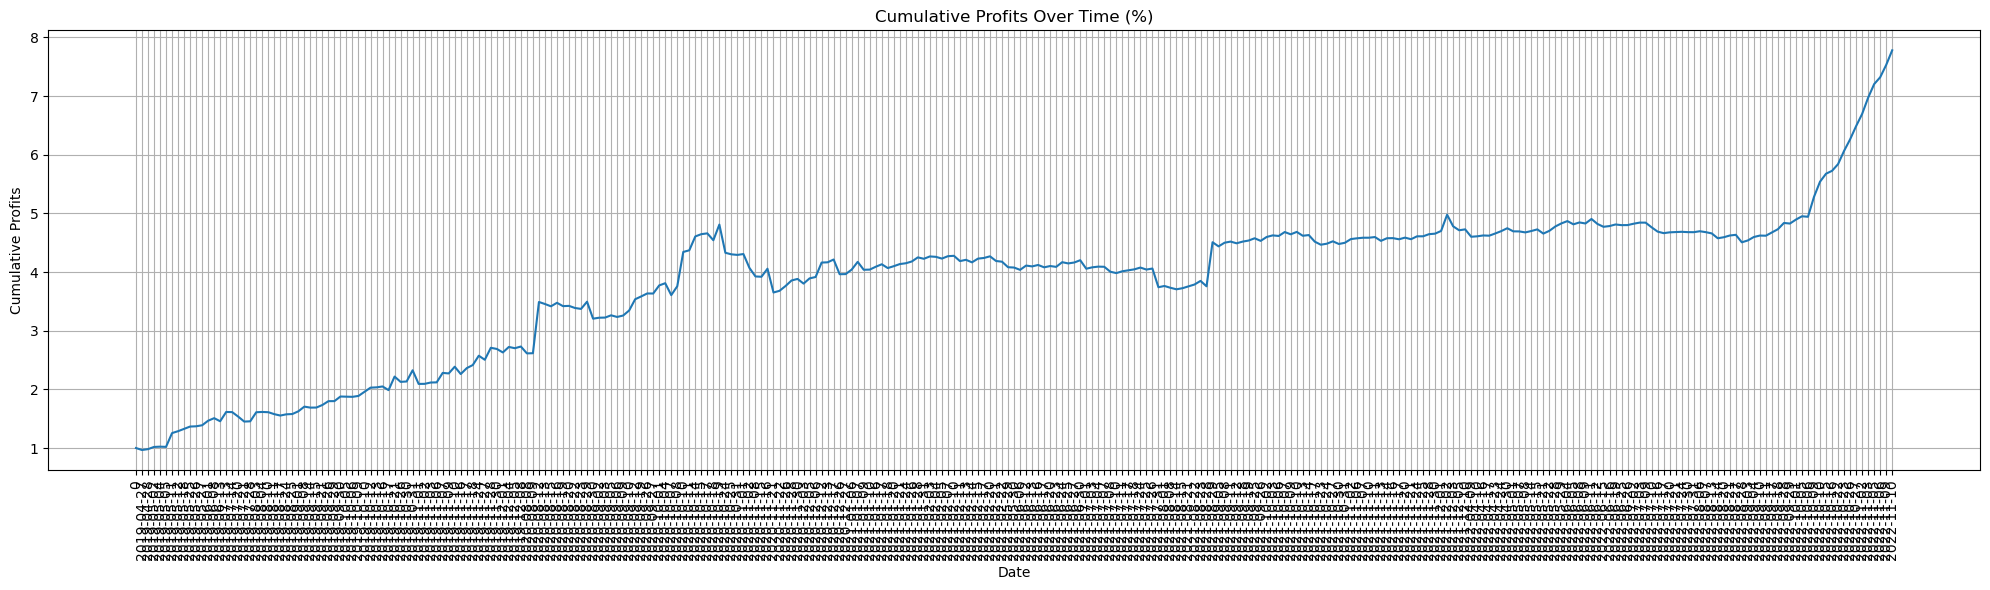

In [18]:
plot_strategy(track_record)

In [19]:
track_record.loc[:, 'year'] = track_record['datetime'].apply(lambda x: x[:4])
track_record

C:\Users\Marcos Augusto\AppData\Local\Temp\ipykernel_14456\3960167630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_record.loc[:, 'year'] = track_record['datetime'].apply(lambda x: x[:4])


,datetime,return,n_bets,count,is_valid_solution,year
0,2019-04-27,0.665453,15,3,True,2019
1,2019-04-28,1.148989,34,7,True,2019
3,2019-05-02,1.383096,25,5,True,2019
4,2019-05-04,1.045380,10,2,True,2019
5,2019-05-05,0.966362,38,8,True,2019
...,...,...,...,...,...,...
308,2022-11-03,1.413580,10,2,True,2022
309,2022-11-05,1.332791,25,5,True,2022
310,2022-11-06,1.161109,20,4,True,2022
311,2022-11-09,1.286985,25,5,True,2022


Year: 2019


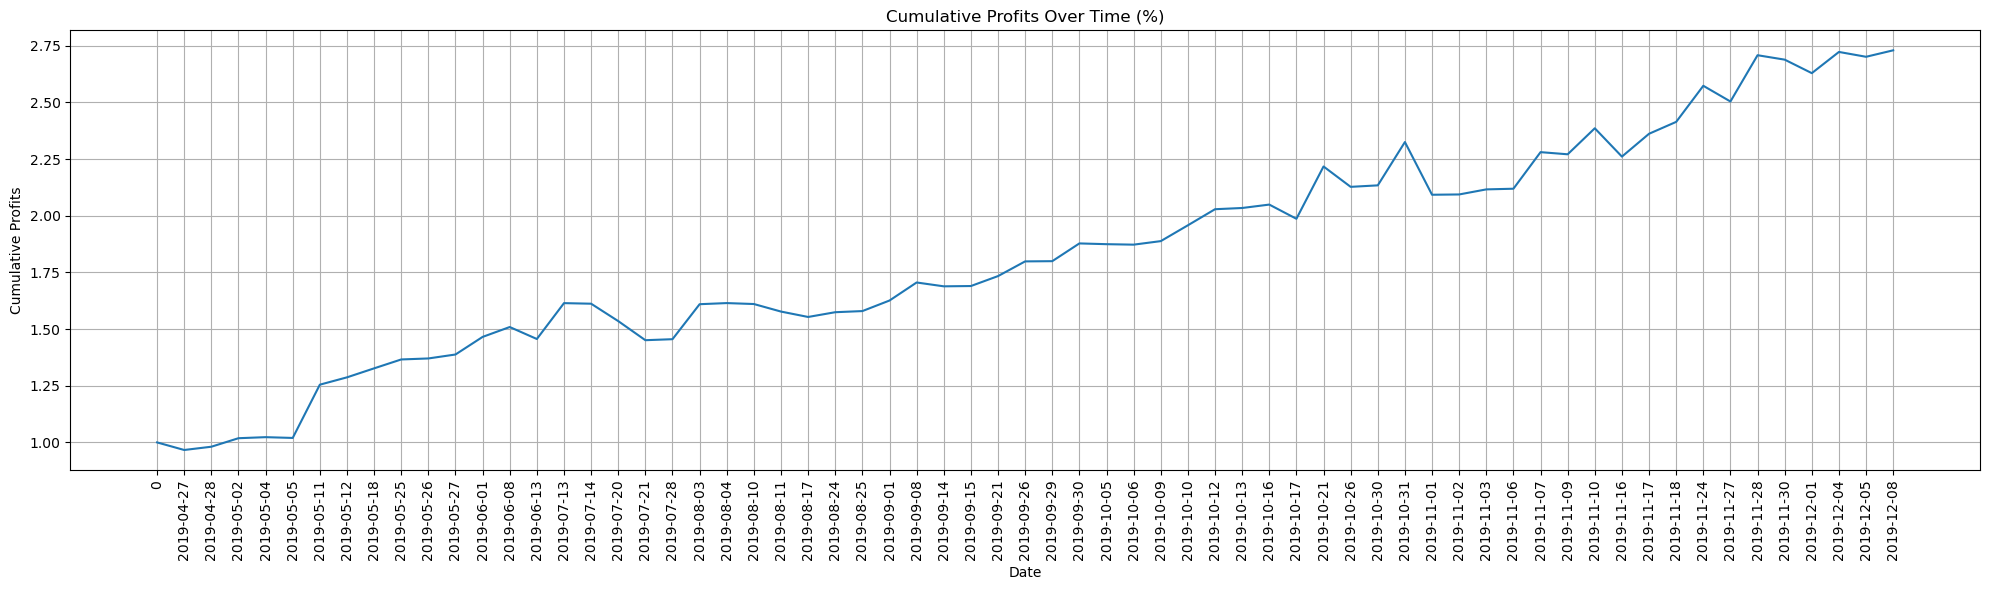

Year: 2020


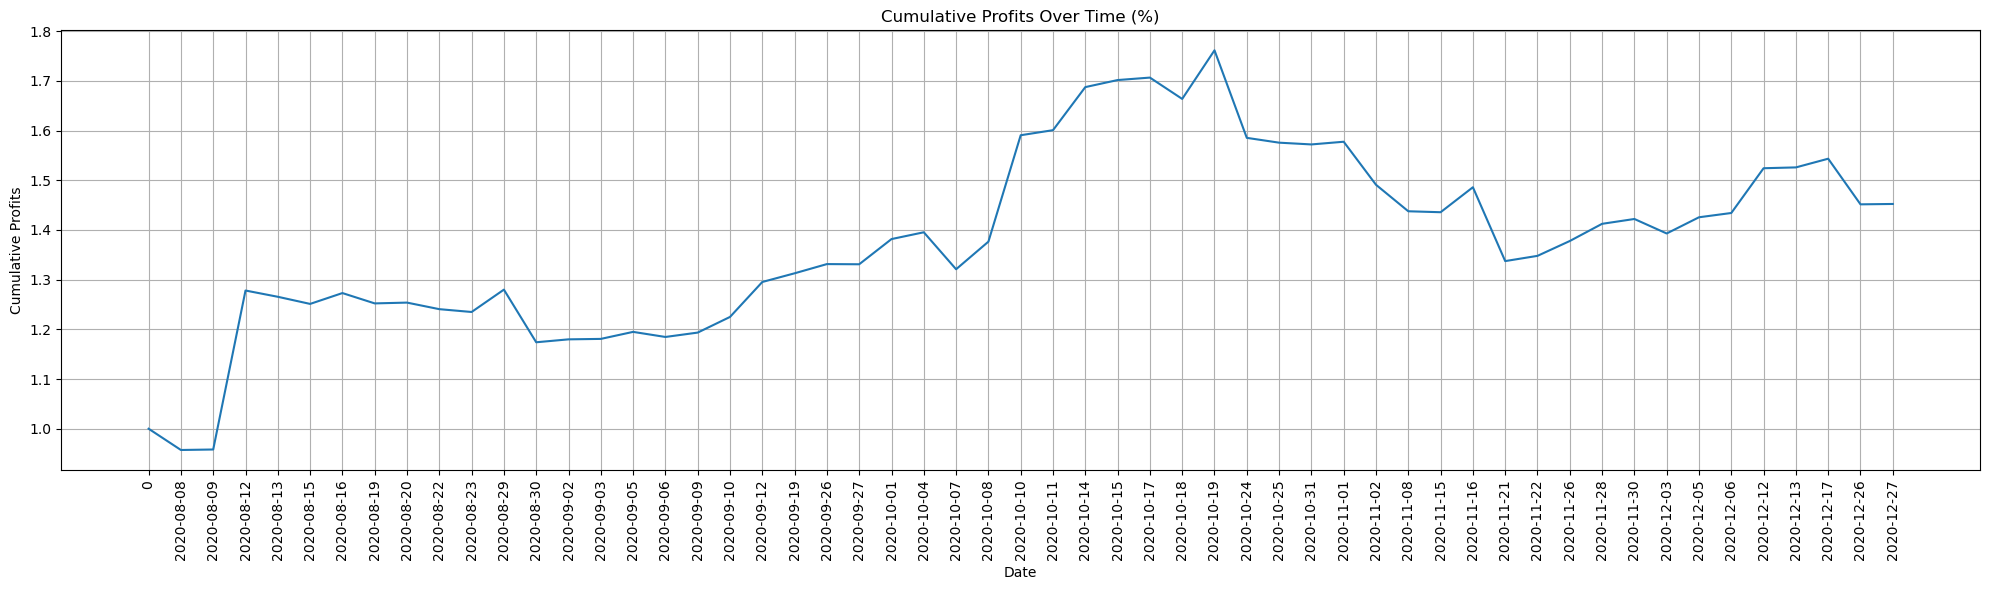

Year: 2021


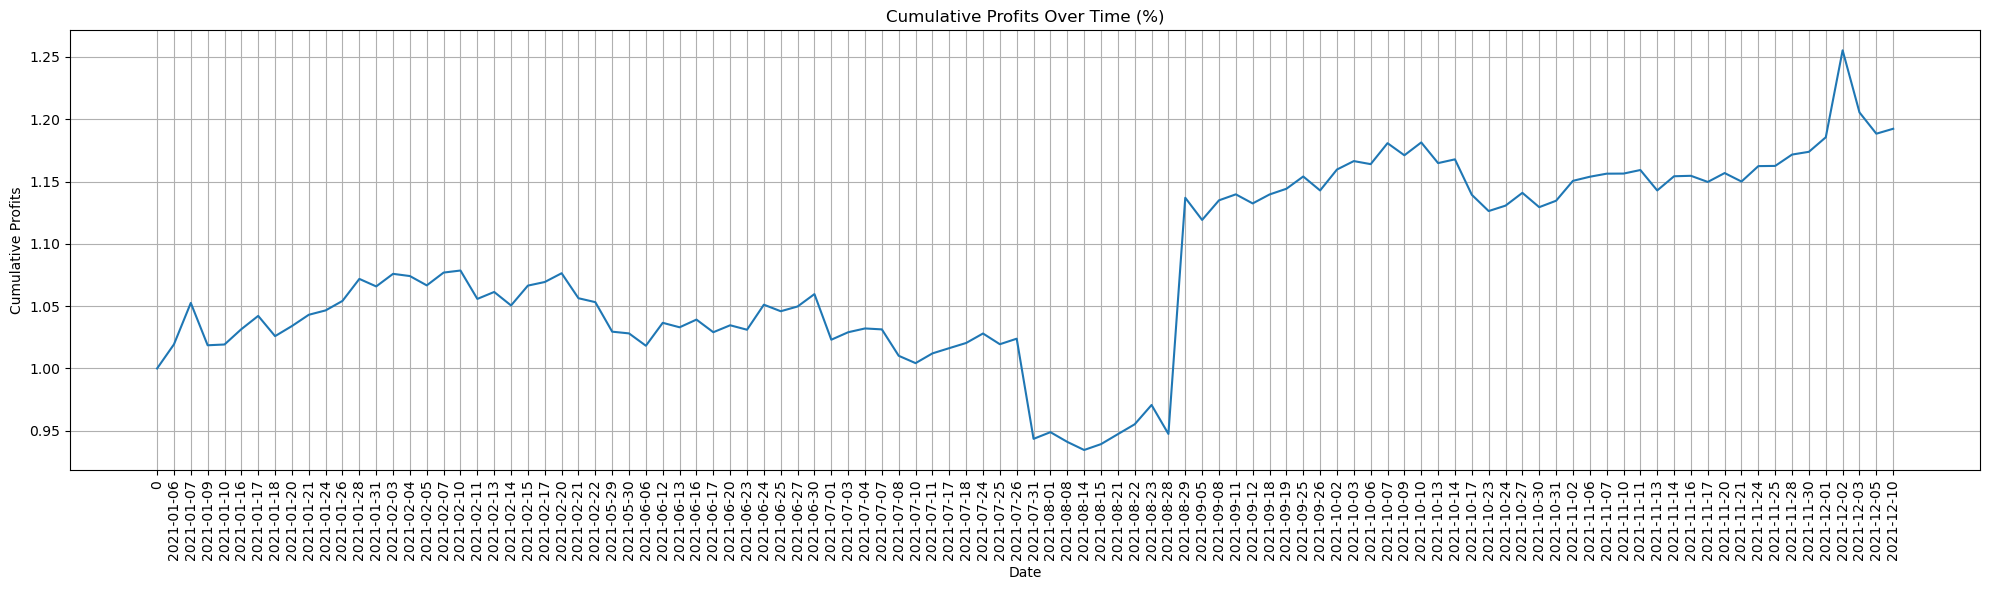

Year: 2022


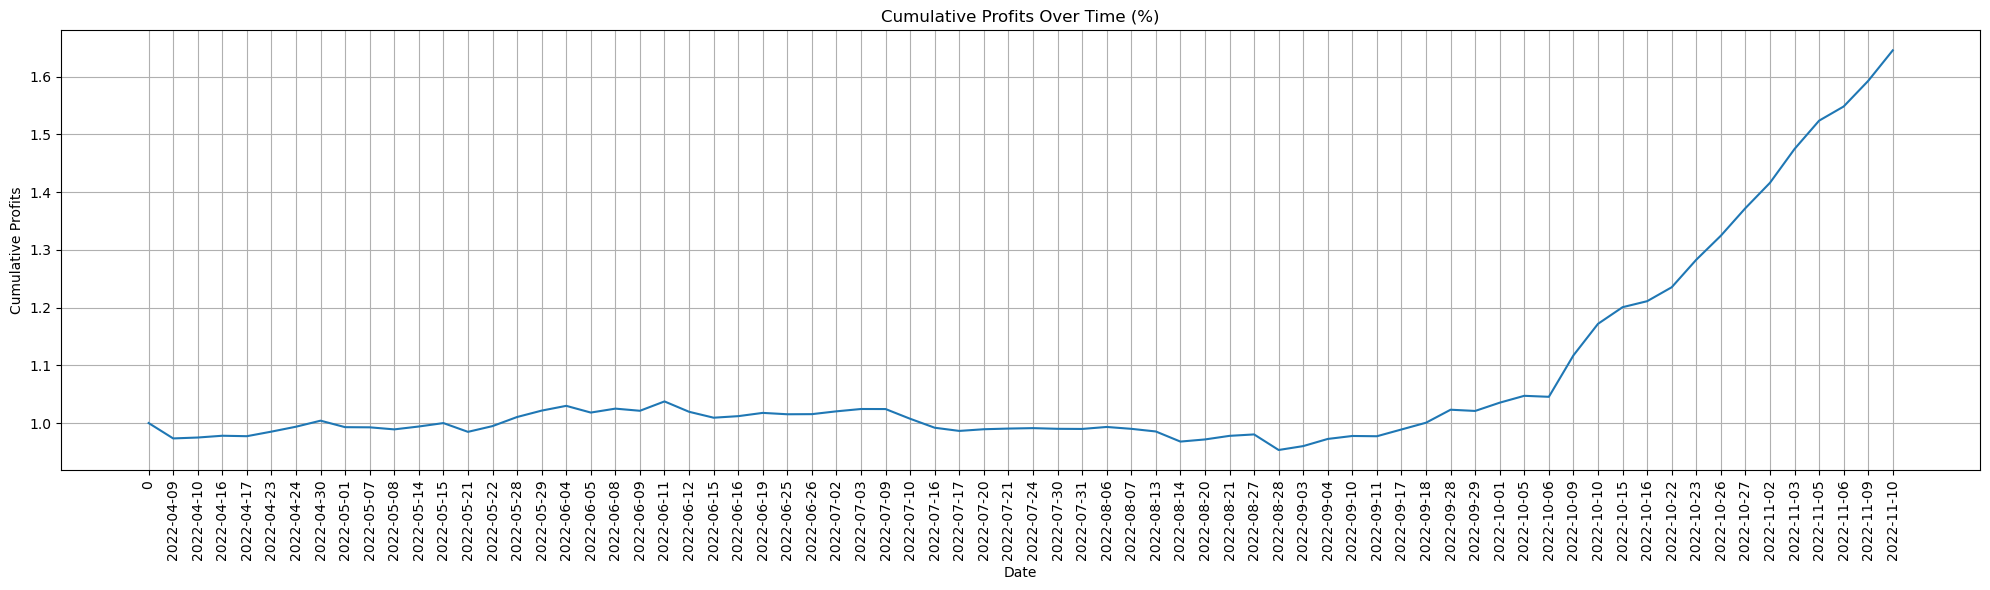

In [20]:
for year in track_record.year.unique():
    print(f"Year: {year}")
    df = track_record[track_record['year']==year]
    stake = compute_stake(df)
    my_df = build_plot_df(df, stake)
    plot_strategy(df)